## <font color='green'> Application of the Logit model (logistic regression) to Default Data

In [1]:
import os
os.chdir('')

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

raw0 = pd.read_csv('Default.csv')

# drop the observations that contain missing values
raw0.dropna()

raw0.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


### <font color='green'> 1) Produce descriptive statistics and visualize data

#### <font color='green'> i) .describe()
* panda .describe(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [2]:
raw0.describe(include = 'all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7056,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


#### <font color='green'> ii) crosstab
* Crosstab: https://pbpython.com/pandas-crosstab.html
    - pd.crosstab(A,B): produce a frequency table with the groups in A on the rows and groups in B on the columns

In [3]:
pd.crosstab(raw0.student,raw0.default)

default,No,Yes
student,,
No,6850,206
Yes,2817,127


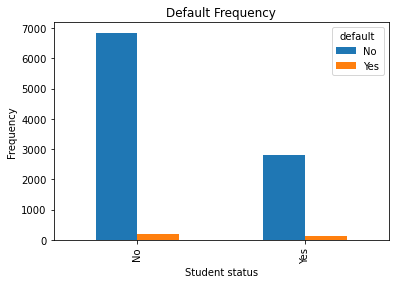

In [4]:
pd.crosstab(raw0.student,raw0.default).plot(kind='bar')

plt.title('Default Frequency')
plt.xlabel('Student status')
plt.ylabel('Frequency')
plt.show()

#### <font color='green'> iii) Histogram
* Histogram: https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html

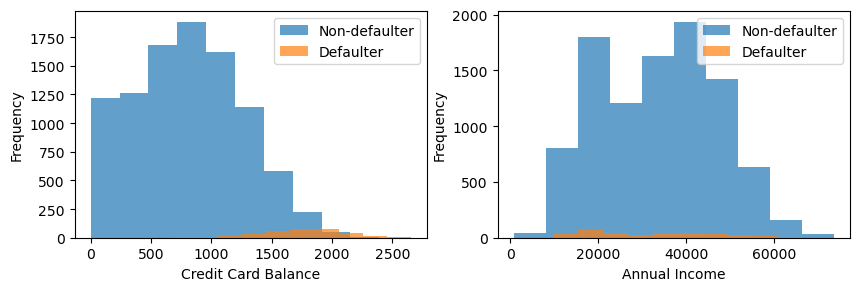

In [5]:
plt.figure(figsize=(10, 3), dpi=100)

plt.subplot(1, 2, 1)
plt.hist(raw0.balance.loc[raw0.default == 'No'],label='Non-defaulter',alpha=0.7) 
plt.hist(raw0.balance.loc[raw0.default == 'Yes'],label='Defaulter',alpha=0.7) 
plt.xlabel('Credit Card Balance')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(raw0.income.loc[raw0.default == 'No'],label='Non-defaulter',alpha=0.7) 
plt.hist(raw0.income.loc[raw0.default == 'Yes'],label='Defaulter',alpha=0.7) 
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.legend()

plt.show()

#### <font color='green'> iv) Boxplot
* boxplot: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

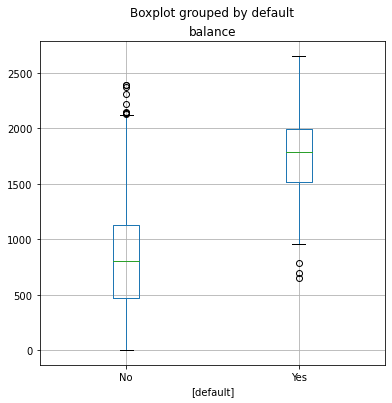

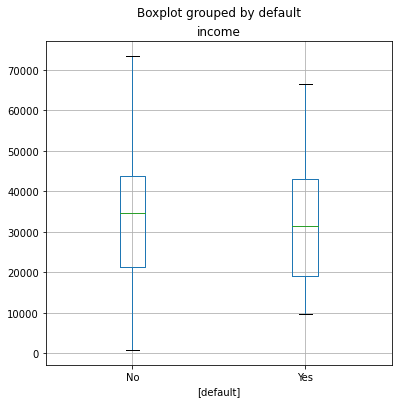

In [6]:
boxplot = raw0.boxplot(column='balance', by=['default'], figsize=(6,6))
boxplot = raw0.boxplot(column='income', by=['default'], figsize=(6,6))

### <font color='green'> 2) Run a logistic regression on the default data

* Two packages to run a logistic regression
    - statsmodels: ***.Logit
    - sklearn.linear_model: LogisticRegression

In [7]:
# create dummies
raw0.default=pd.get_dummies(raw0.default,drop_first=True) # default = 1
raw0.student=pd.get_dummies(raw0.student,drop_first=True) # student = 1

In [8]:
# Run a logistic regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

Y = raw0.default
X = raw0.iloc[:,2:]
X = sm.add_constant(X)

logitres=sm.Logit(Y,X).fit() # plug in Y first; case sensitive: Logit (o) logit(x)

print(logitres.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: default          AIC:              inf   
Date:               2022-03-18 20:49 BIC:              inf   
No. Observations:   10000            Log-Likelihood:   -inf  
Df Model:           3                LL-Null:          0.0000
Df Residuals:       9996             LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     10.0000                                  
-------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-------------------------------------------------------------
const      -10.8690   0.4923 -22.0793 0.0000 -11.8339 -9.9042
student     -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
balance      0.0057   0.0002  24.7365 0.0000   0.0053  0.0

C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\base\model.py:547: Hess

In [9]:
# logistic regression with interaction and higer order

logitres2=smf.logit('default ~ student + income + balance + student*balance + student*income + np.power(income,2) + np.power(balance,2)', data=raw0).fit() # logit (o), Logit(x)

print(logitres2.summary2())

Optimization terminated successfully.
         Current function value: 0.078496
         Iterations 12
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.462      
Dependent Variable:  default           AIC:               1585.9225  
Date:                2022-03-18 20:49  BIC:               1643.6052  
No. Observations:    10000             Log-Likelihood:    -784.96    
Df Model:            7                 LL-Null:           -1460.3    
Df Residuals:        9992              LLR p-value:       1.7668e-287
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      12.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
Intercept            -9.9217   1.5375 -6.4530 0.0000 -12.9352 -6.9082
student        

### <font color='green'> 3) Calculate/show default probability for students and non-students, separately, as a function of balance, holding income at its mean

* see the lecture note 6, page 6-7 (or textbook chapter 4.3)

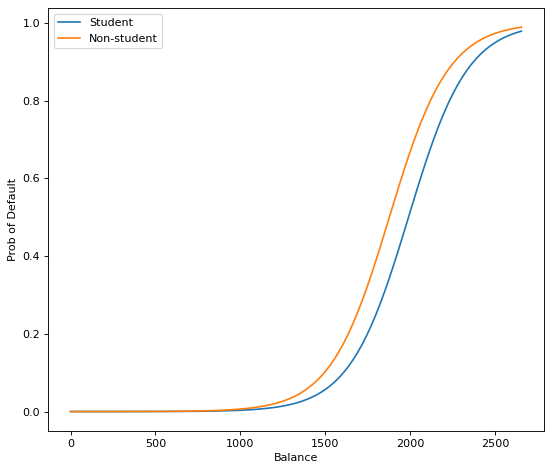

In [10]:
grid0 = np.linspace(raw0.balance.min(), raw0.balance.max(), 100).reshape((100,1))
xx1 = np.concatenate((np.ones((100,1)),np.ones((100,1)),grid0,np.ones((100,1))*raw0.income.mean()), axis=1)
xx2 = np.concatenate((np.ones((100,1)),np.zeros((100,1)),grid0,np.ones((100,1))*raw0.income.mean()), axis=1)
prd1 = logitres.predict(xx1)
prd2 = logitres.predict(xx2)

plt.figure(figsize=(8, 7), dpi=80)
plt.plot(grid0,prd1,label='Student')
plt.plot(grid0,prd2,label='Non-student')
plt.xlabel('Balance')
plt.ylabel('Prob of Default')
plt.legend()
plt.show()

### <font color='green'> 4) Calculate marginal effect of a variable on default probability

* For the calculation of marginal effect of a continuous variable (e.g. balance or income) on default probability, 
    
    1. you can use the formula (1) on page 6 of the lecture note 6. 
    2. Or you can use ".get_margeff( )" function in statsmodels 
     * see: https://towardsdatascience.com/binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation-49b025f1b510 and https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.DiscreteResults.get_margeff.html
     * However, remember that the five different types of the marginal effects calculated from the ".get_margeff( )" doesn't include the marginal effect computed by the formula (1).

In [11]:
meff=logitres.get_margeff(at = 'mean', method = 'dydx', dummy = True)
print(meff.summary())

        Logit Marginal Effects       
Dep. Variable:                default
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
student       -0.0012      0.000     -2.794      0.005      -0.002      -0.000
balance       1.2e-05   1.83e-06      6.568      0.000    8.42e-06    1.56e-05
income      6.345e-09   1.72e-08      0.369      0.712   -2.74e-08    4.01e-08


### <font color='darkred'> HW6: Calculate the marginal effect of the student status on default probability, holding income and balance at their means, using the formula (2) on page 7 of the lecture note 6

* Note that the student variable is binary

### <font color='green'> 5) Evaluate the logit regression

#### <font color='green'> i) Out of sample prediction accuracy: test error

In [12]:
# Note: logit in statsmodels provides the summary table but logit in sklearn.linear_model doesn't.
# However, logit in sklearn.linear_model has some useful attributes like prediction score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
logreg = LogisticRegression(fit_intercept=0, solver = 'lbfgs').fit(X_train, y_train)

logreg.score(X_test, y_test)

0.9696666666666667

#### <font color='green'> ii) Confusion Matrix
    
* https://en.wikipedia.org/wiki/Confusion_matrix
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test) # prediction
cm_logit = confusion_matrix(y_test, y_pred)
print(cm_logit)

[[2895    9]
 [  82   14]]


## <font color='green'> Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA) and K-Nearest Neighbors (KNN)

### <font color='green'> Application of LDA and QDA to the default data

* LDA: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
* QDA: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
* Visualization of LDA \& QDA: https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
X_train=X_train.drop('const', axis=1) # An intercept will be automatically included in the model, so we need to remove it from X
X_test=X_test.drop('const', axis=1)

# test error
LDAres = LDA().fit(X_train, y_train)
QDAres = QDA().fit(X_train, y_train)

print(LDAres.score(X_test, y_test))
print(QDAres.score(X_test, y_test))

0.9723333333333334
0.973


In [15]:
# confusion matrix
y_pred_LDA = LDAres.predict(X_test)

y_pred_QDA = QDAres.predict(X_test)

cm_LDA = confusion_matrix(y_test, y_pred_LDA)
print(cm_LDA)
cm_QDA = confusion_matrix(y_test, y_pred_QDA)
print(cm_QDA)

[[2895    9]
 [  74   22]]
[[2894   10]
 [  71   25]]


### <font color='green'> Application of KNN to the default data
* KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Visualization of KNN: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

In [16]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

# test error
KNNCres = KNNC(n_neighbors = 5).fit(X_train, y_train)
print(KNNCres.score(X_test, y_test))

0.9713333333333334


In [17]:
# confusion matrix
y_pred_KNNC = KNNCres.predict(X_test)

cm_KNNC = confusion_matrix(y_test, y_pred_KNNC)
print(cm_KNNC)

[[2896    8]
 [  78   18]]


### <font color='darkred'> HW6-2: Optimize/tune the number of neighbors of KNN using cross-validation
    
* Use the function "GridSearchCV" in scikitlearn:
    - Manual: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    - An example: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
* Use "precision" to evaluate the prediction performance at each number of neighbors
* Use the default data
* Visualize your results using a graph which plot the prediction performances at the numbers of neigbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Create train and test data and set a random state
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 5)
knn = KNeighborsClassifier()

# Create the dictionary of k valus
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)

# Grid search
grid = GridSearchCV(knn, param_grid, cv=5, scoring='precision_macro')
grid_search=grid.fit(X_train, y_train)

#Storing value for graph
k_number = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
means = [list(range(1,21))]
stds = [list(range(1,21))]
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

In [58]:
means

array([0.63856449, 0.77307038, 0.70325021, 0.73073466, 0.74083624,
       0.72069239, 0.7415148 , 0.80729891, 0.79076643, 0.80897029,
       0.810771  , 0.85063917, 0.85904182, 0.71696464, 0.817103  ,
       0.71703392, 0.71703392, 0.63356453, 0.73363366, 0.68356683])

In [59]:
stds

array([0.02056316, 0.08540418, 0.0181979 , 0.04246303, 0.02407579,
       0.09240798, 0.04373243, 0.14676623, 0.11031404, 0.10004108,
       0.09219456, 0.12480583, 0.12368273, 0.22621124, 0.2110428 ,
       0.2264509 , 0.2264509 , 0.20026161, 0.22392114, 0.24523499])

In [60]:
k_number

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

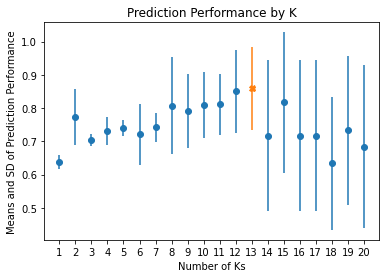

In [63]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

pointsk = [k_number for i,k_number in enumerate(k_number) if i!=12] 
pointsm = [means for i,means in enumerate(means) if i!=12] 
stdp = [stds for i,stds in enumerate(stds) if i!=12] 

plt.errorbar(pointsk, pointsm, stdp, linestyle='None', marker='o')
plt.errorbar(k_number[12], means[12], stds[12], marker = 'X')

ax.set_xlabel('Number of Ks')
ax.set_ylabel('Means and SD of Prediction Performance')
ax.set_title('Prediction Performance by K')
ax.set_xticks(k_number)

plt.show()

Based on the results, we can see that a k at 13 has the highest mean prediction performance based on precision. This is approximately 86%.